<a href="https://colab.research.google.com/github/duongnhathuy/A_I/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Money/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Money/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 176 images belonging to 11 classes.
Found 44 images belonging to 11 classes.


In [ ]:
# X_train.shape, y_train.shape,X_test.shape,y_test.shape
train_dataset.classes
train_dataset.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [ ]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM 
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical  
from keras import callbacks 
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score

In [ ]:
#Make model
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history=model.fit(train_dataset,batch_size=32,epochs=100,verbose=1,validation_data=validation_dataset)

18/18 [==============================] - 26s 1s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.9183 - val_accuracy: 0.7727
Epoch 97/100
18/18 [==============================] - 23s 1s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 2.0420 - val_accuracy: 0.7727
Epoch 98/100
18/18 [==============================] - 23s 1s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1236 - val_accuracy: 0.7727
Epoch 99/100
18/18 [==============================] - 23s 1s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 2.2797 - val_accuracy: 0.7727
Epoch 100/100
18/18 [==============================] - 24s 1s/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 2.0844 - val_accuracy: 0.7727


In [ ]:
model.save('Money.h5')

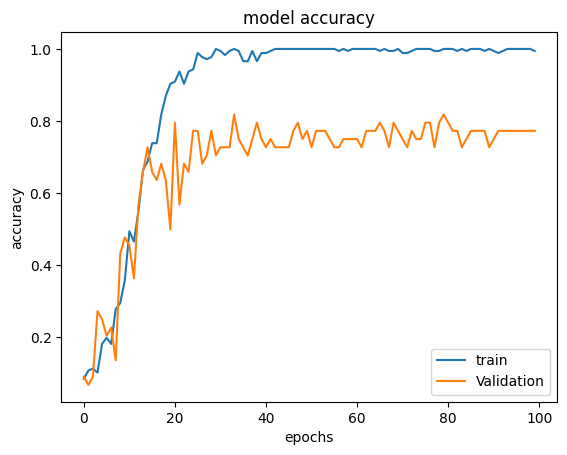

In [ ]:
# draw learning process
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
#Printed wrong and accuracy
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  2.08437442779541
Độ chính xác  0.7727272510528564


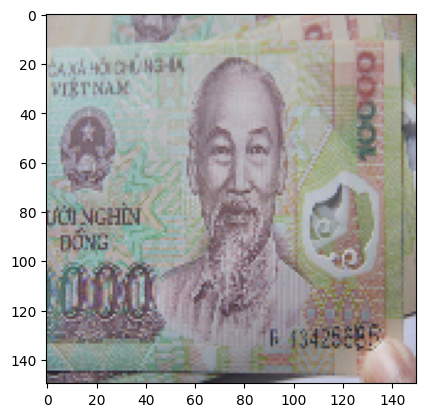

1/1 [==============================] - 0s 51ms/step
10k


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = '/content/drive/MyDrive/10k-test.jpg'
img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("1k")
if(kq==1):
    print("10k")
if(kq==2):
    print("100k")
if(kq==3):
    print("200")
if(kq==4):
    print("2k")
if(kq==5):
    print("20k")
if(kq==6):
    print("200k")
if(kq==7):
    print("500")
if(kq==8):
    print("5k")
if(kq==9):
    print("50k")
if(kq==10):
    print("500k")